In [1]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [3]:
Train_df = pd.read_csv('Salaries.csv')
Train_df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
Train_df['yrs.service'].unique().dtype

dtype('int64')

In [5]:
Train_df['yrs.since.phd'].unique().dtype

dtype('int64')

In [6]:
Train_df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

<AxesSubplot:xlabel='rank', ylabel='count'>

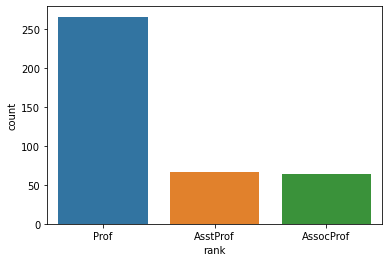

In [7]:
sns.countplot(x = 'rank',data = Train_df)

<AxesSubplot:xlabel='discipline', ylabel='count'>

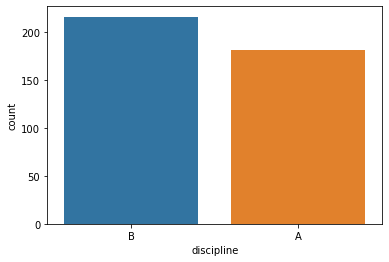

In [8]:
sns.countplot(x = 'discipline',data = Train_df)

<AxesSubplot:xlabel='sex', ylabel='count'>

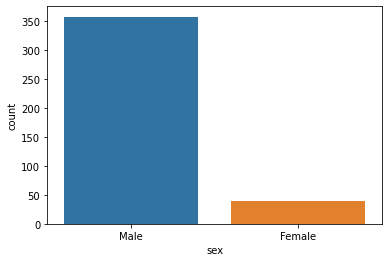

In [9]:
sns.countplot(x = 'sex',data = Train_df)

In [10]:
Train_df['discipline']= label_encoder.fit_transform(Train_df['discipline'])

In [11]:
Train_df['discipline'].unique().dtype

dtype('int32')

In [12]:
Train_df.dtypes

rank             object
discipline        int32
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [13]:
Train_df = Train_df.drop(['sex','rank'], axis=1)

In [14]:
Train_df.dtypes

discipline       int32
yrs.since.phd    int64
yrs.service      int64
salary           int64
dtype: object

In [15]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   discipline     397 non-null    int32
 1   yrs.since.phd  397 non-null    int64
 2   yrs.service    397 non-null    int64
 3   salary         397 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.0 KB


In [16]:
Train_df['discipline'].astype('int64')

0      1
1      1
2      1
3      1
4      1
      ..
392    0
393    0
394    0
395    0
396    0
Name: discipline, Length: 397, dtype: int64

In [17]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   discipline     397 non-null    int32
 1   yrs.since.phd  397 non-null    int64
 2   yrs.service    397 non-null    int64
 3   salary         397 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.0 KB


In [18]:
Train_df.describe()

,discipline,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,0.544081,22.314861,17.614610,113706.458438
std,0.498682,12.887003,13.006024,30289.038695
min,0.000000,1.000000,0.000000,57800.000000
25%,0.000000,12.000000,7.000000,91000.000000
50%,1.000000,21.000000,16.000000,107300.000000
75%,1.000000,32.000000,27.000000,134185.000000
max,1.000000,56.000000,60.000000,231545.000000


In [19]:
print('Salary Skewness:', Train_df.skew())

Salary Skewness: discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64


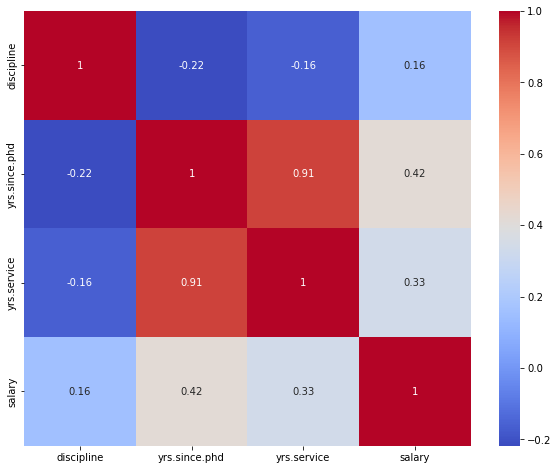

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_df.corr(), cmap='coolwarm', annot=True);

Text(0.5, 1.0, 'Histogram for Salary')

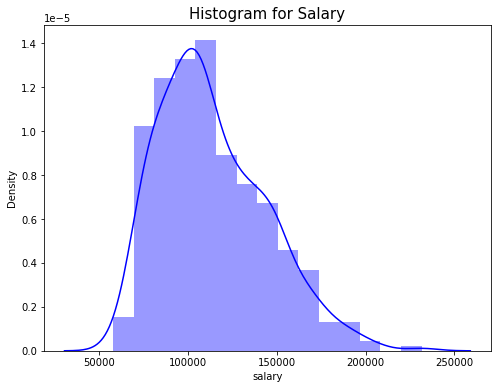

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(Train_df['salary'],kde = True , color ='blue')
plt.title('Histogram for Salary', fontsize=15)

In [22]:
data=Train_df

In [46]:
X = data.drop('salary',axis=1)
Y = data['salary']

In [47]:
X

,discipline,yrs.since.phd,yrs.service
0,1,19,18
1,1,20,16
2,1,4,3
3,1,45,39
4,1,40,41
...,...,...,...
392,0,33,30
393,0,31,19
394,0,42,25
395,0,25,15


In [25]:
Y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [48]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((317, 3), (80, 3), (317,), (80,))

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test , Y_test)

0.3526459851176269

In [28]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

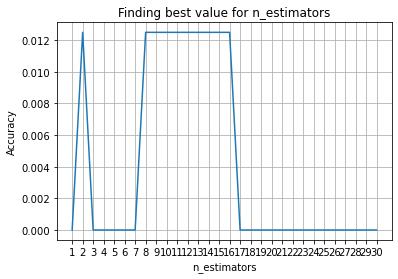

Highest value:  0.0125


In [29]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [30]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [31]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [32]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [33]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [34]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [35]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [36]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [37]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 0.0
K Nearest neighbors: 0.0
Support Vector Classifier: 1.25
Naive Bayes: 0.0
Decision tree: 0.0
Random Forest: 0.0


In [39]:
y_pred = lr.predict(X_test)

In [43]:
y_pred

array([104742.12877467,  91038.2826501 , 127562.29003874,  99228.23644364,
       104150.56052847, 107872.99369943,  98064.60443956, 104742.12877467,
        95645.3181235 , 109092.38910162, 108640.33570624,  97456.2817719 ,
       151147.04324276, 106689.85720703, 113995.20869813, 115474.12931363,
       114430.50767205, 119369.58617834, 101474.49906596,  94621.20097024,
       110867.09384023,  88063.68699762,  90446.7144039 , 122812.98964766,
       123700.34201697,  88951.03936693, 109664.4528595 , 119372.3362452 ,
       112343.26438888, 123111.52383762, 113997.95876498, 112047.48026578,
       101767.5331222 , 109664.4528595 , 107281.42545323,  99819.80468985,
       126066.61500177, 122798.98529305, 115510.38822342, 108777.1004902 ,
       131145.20835888, 118465.47938757, 123842.60693464, 120396.45339846,
       118797.52242046, 105648.9856323 , 120555.4727376 , 119841.14406204,
       117720.39193594, 104917.90253528, 104446.34465157,  98499.90341348,
       140554.55755462, 1

In [45]:
Y_test

65     100522
132     77500
74     113398
78      86100
37      86373
        ...  
268     89650
234     69700
145    119015
164     88795
124     96614
Name: salary, Length: 80, dtype: int64

In [52]:
X_train=np.arange(0,len(X_train),1)